# Exploratory Data Analysis (EDA) – Gradient Boosting Classifier Model

## Dataset

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
%matplotlib inline


In [182]:
# Load the dataset
df = pd.read_csv("/workspaces/CS_Group07_StudentDepressionDetection/Data/Student Depression Dataset.csv")  # adjust path if needed
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Check shape, info, nulls

In [183]:
print("Shape (Rows, columns):", df.shape)
print("\nInfo (Column type & non-null values):")
print(df.info())
print("\nMissing Values per column:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Shape (Rows, columns): (27901, 18)

Info (Column type & non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 

In [184]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

### Drop nulls

In [185]:
df = df.dropna() #Remove rows with missing values
print("\nShape after removing missing values:", df.shape)


Shape after removing missing values: (27898, 18)


### Check data types

In [186]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

### Clean column names

Removes spaces and question marks in column names

In [187]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("?", "")
df.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## General Analysis

### Statistical summary 

In [188]:
print(df.describe(include='all'))

                   id Gender           Age    City Profession  \
count    27898.000000  27898  27898.000000   27898      27898   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15546           NaN    1570      27867   
mean     70442.953402    NaN     25.822174     NaN        NaN   
std      40642.015063    NaN      4.905651     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35040.750000    NaN     21.000000     NaN        NaN   
50%      70689.000000    NaN     25.000000     NaN        NaN   
75%     105824.750000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic_Pressure  Work_Pressure          CGPA  Study_Satisfaction  \
count        27898.000000   27898.000000  27898.000000        27898.000000   
unique                NaN            NaN           NaN         

### Target column distribution (Depressed vs Not Depressed)

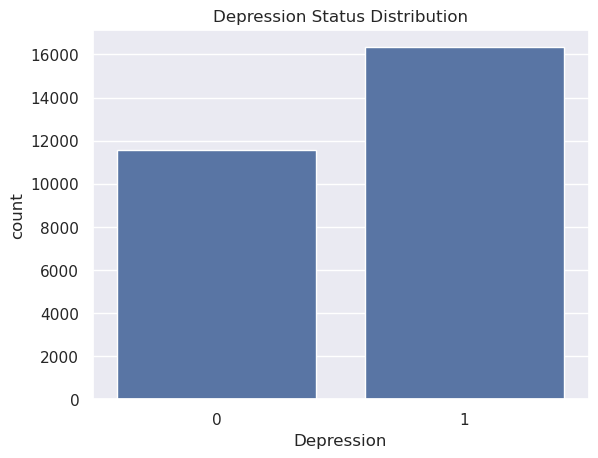

In [189]:
sns.countplot(data=df, x='Depression')
plt.title('Depression Status Distribution')
plt.show()


### Categorical and Numerical columns

In [190]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)
print("Number of Categorical Columns:", len(categorical_cols))
print("\nNumerical Columns:", numerical_cols)
print("Number of Numerical Columns:", len(numerical_cols))



Categorical Columns: ['Gender', 'City', 'Profession', 'Sleep_Duration', 'Dietary_Habits', 'Degree', 'Have_you_ever_had_suicidal_thoughts_', 'Family_History_of_Mental_Illness']
Number of Categorical Columns: 8

Numerical Columns: ['id', 'Age', 'Academic_Pressure', 'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction', 'Work/Study_Hours', 'Financial_Stress', 'Depression']
Number of Numerical Columns: 10


#### Categoricla columns

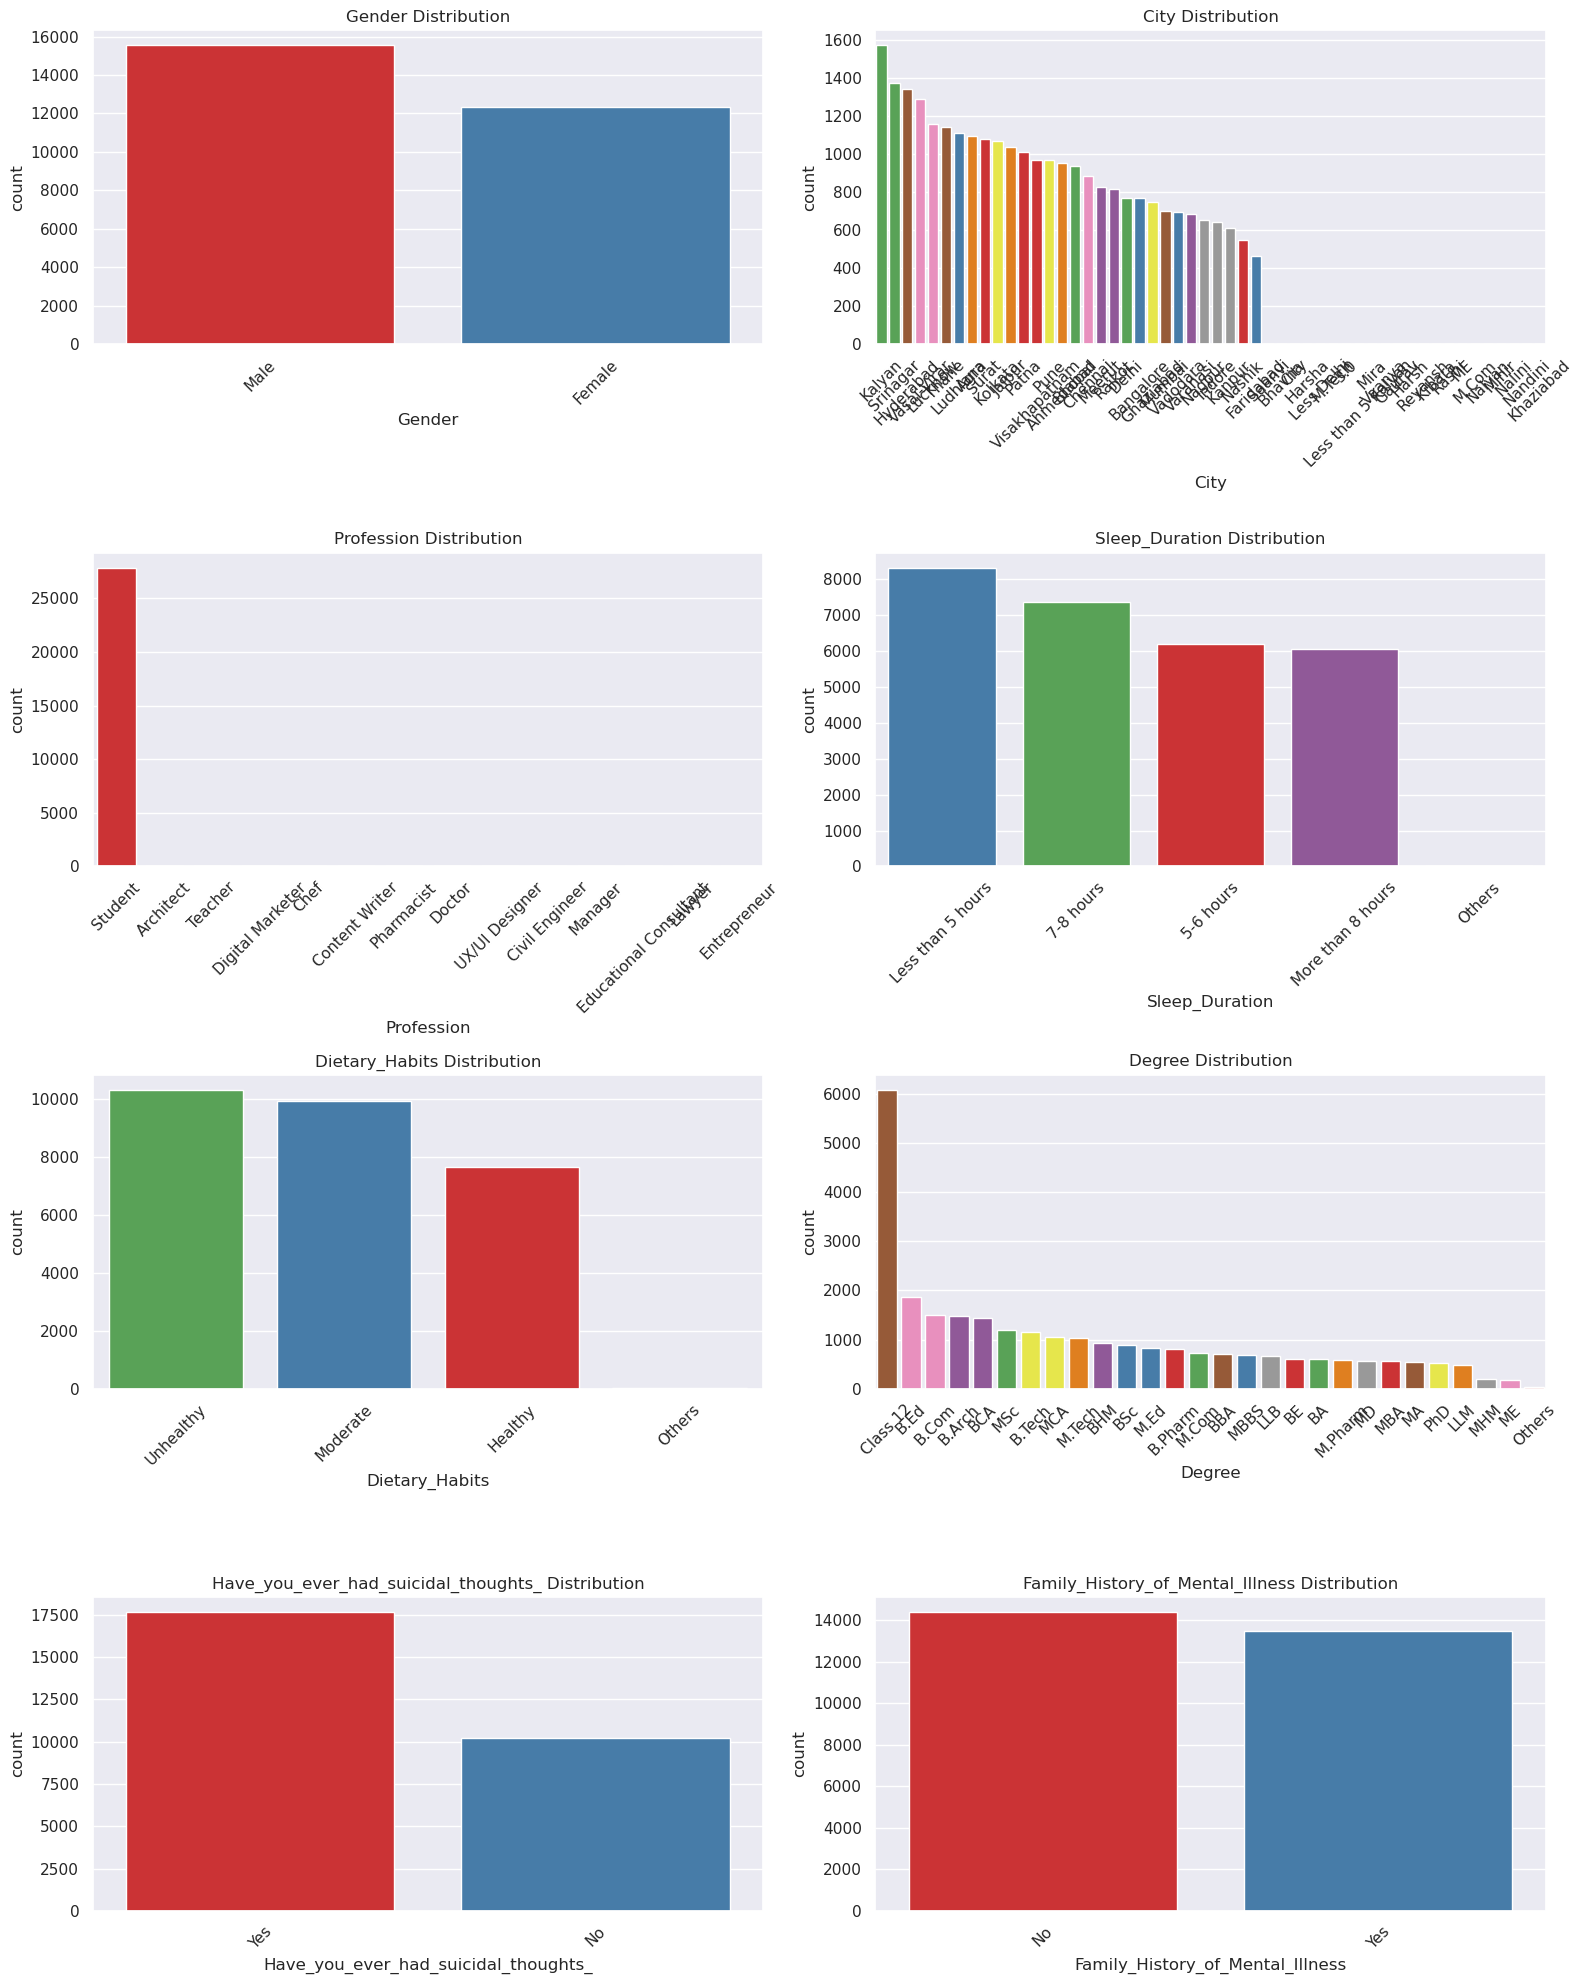

In [191]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col,hue=col, order=df[col].value_counts().index, palette='Set1')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Numerical Columns

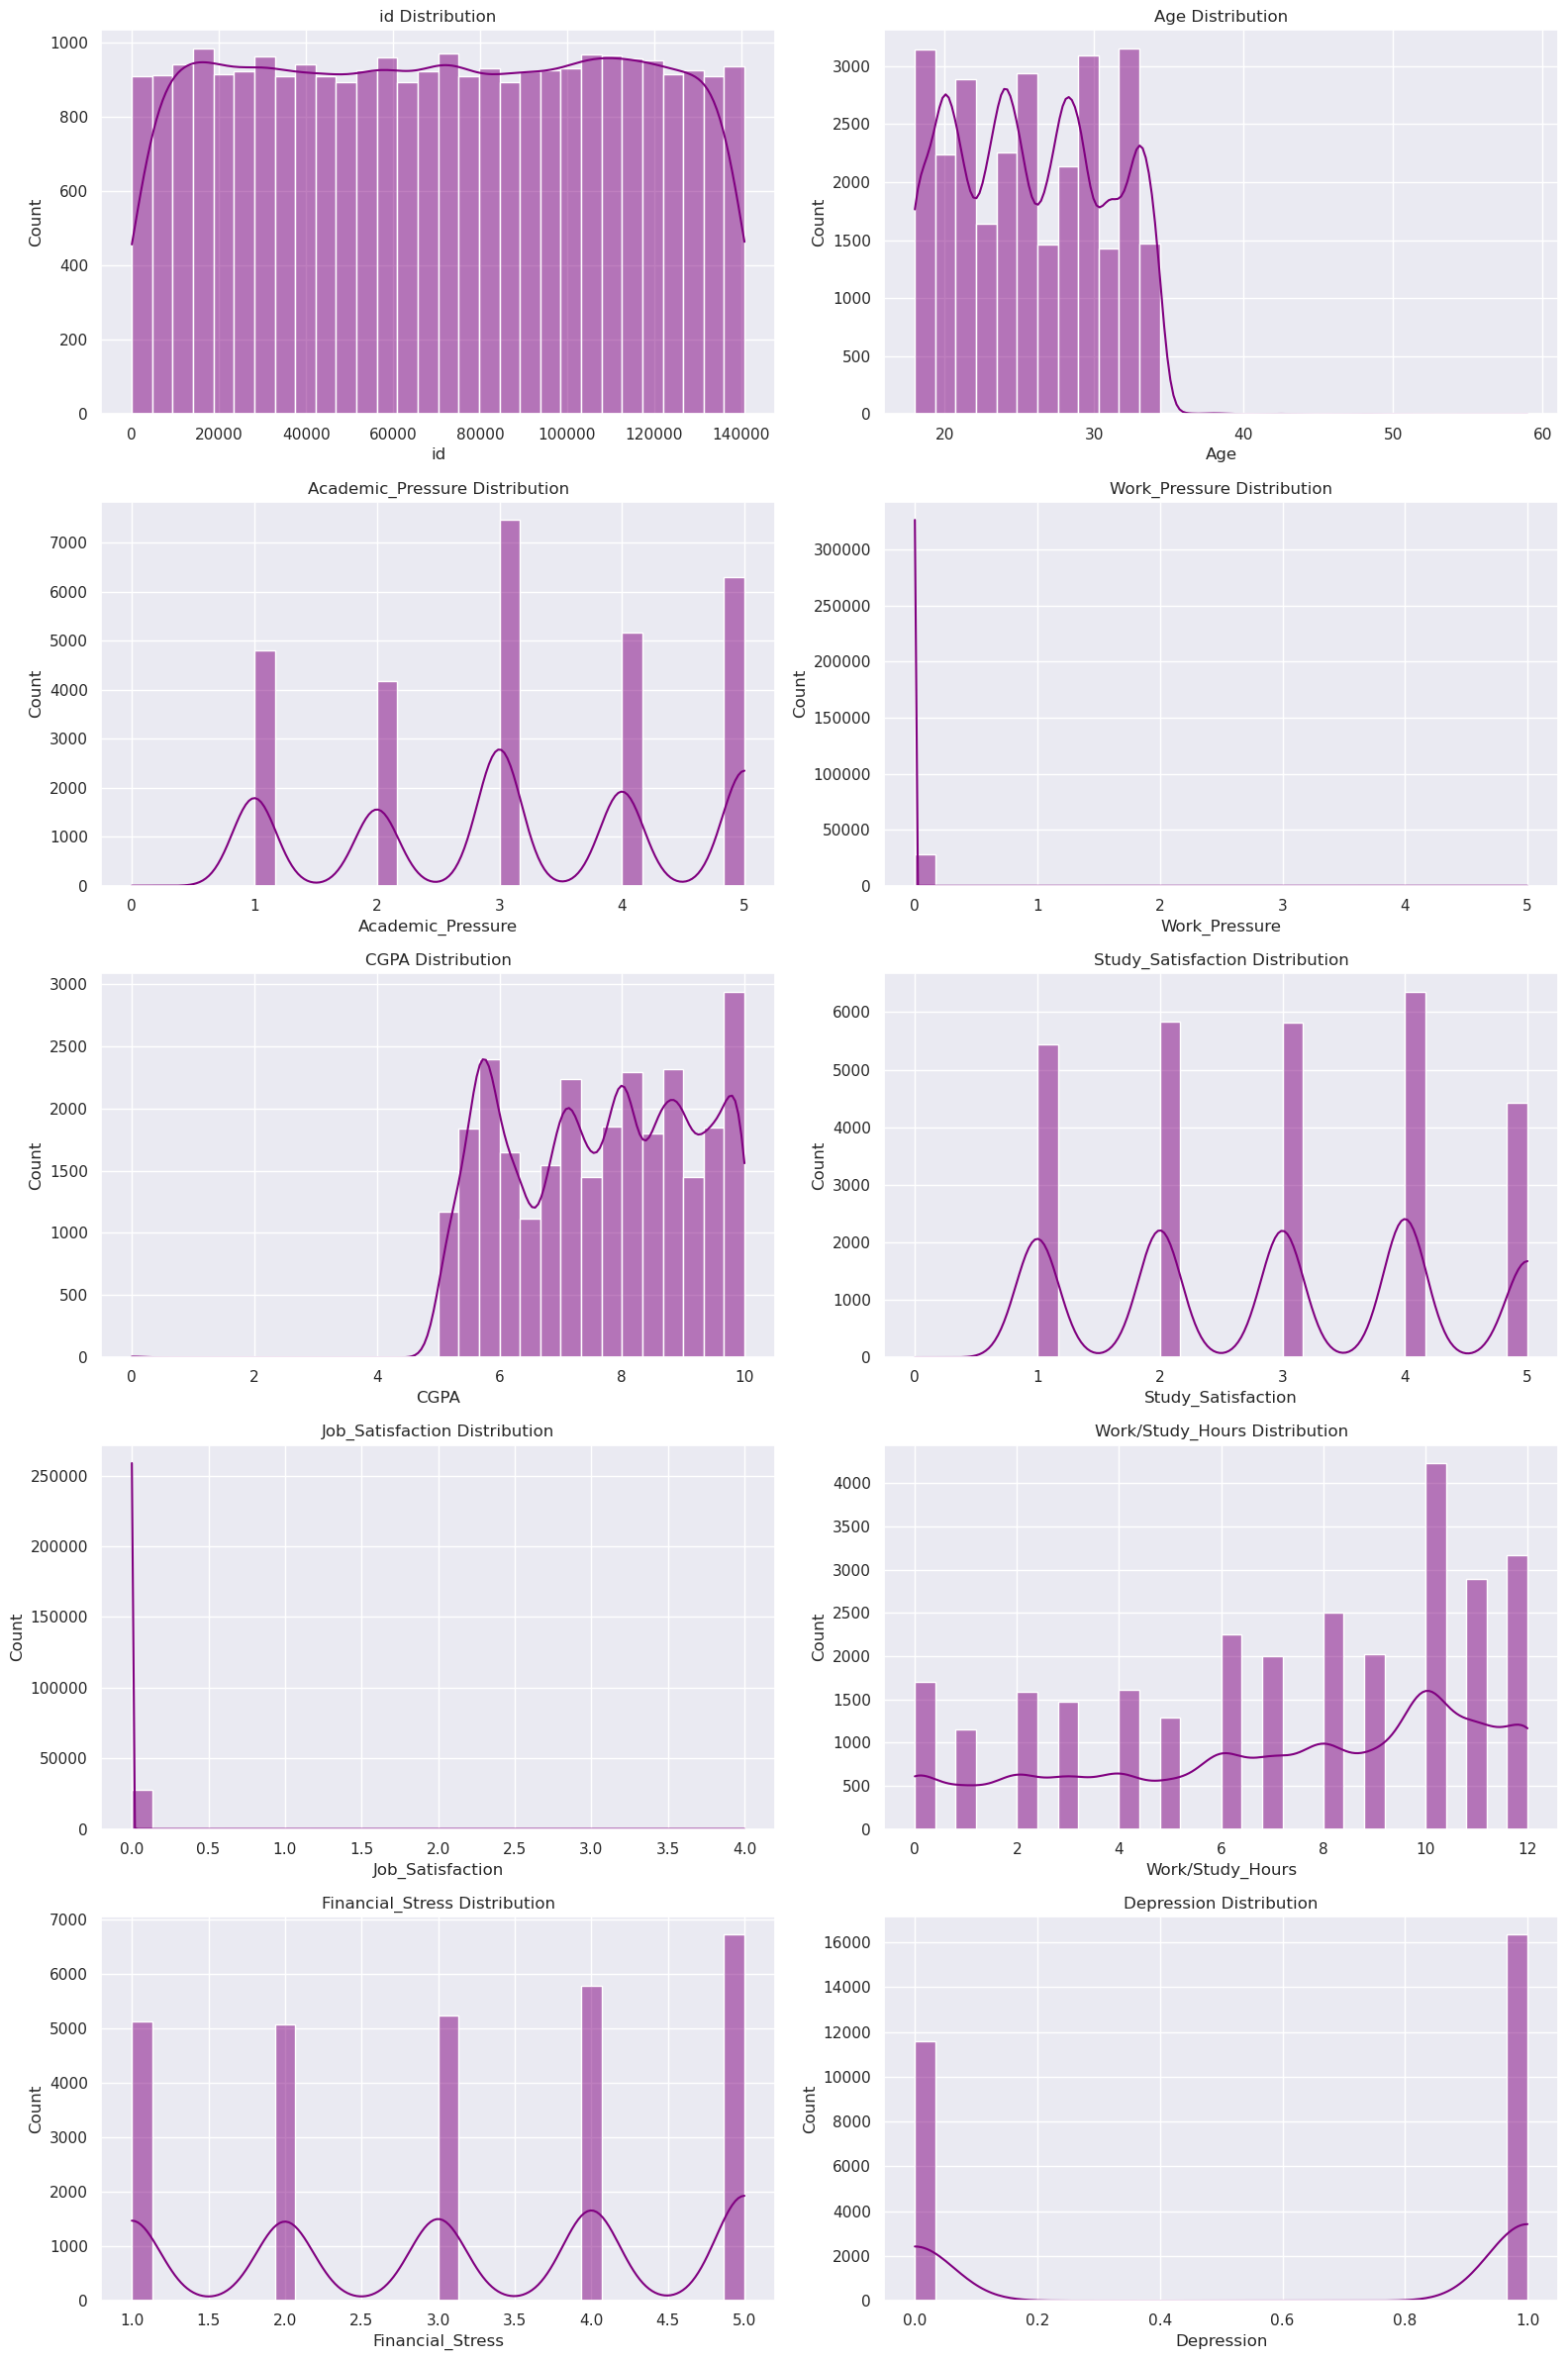

In [192]:
plt.figure(figsize=(16, 24))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, color='purple', bins=30)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

### Count plots of categorical variables vs target (Depression)

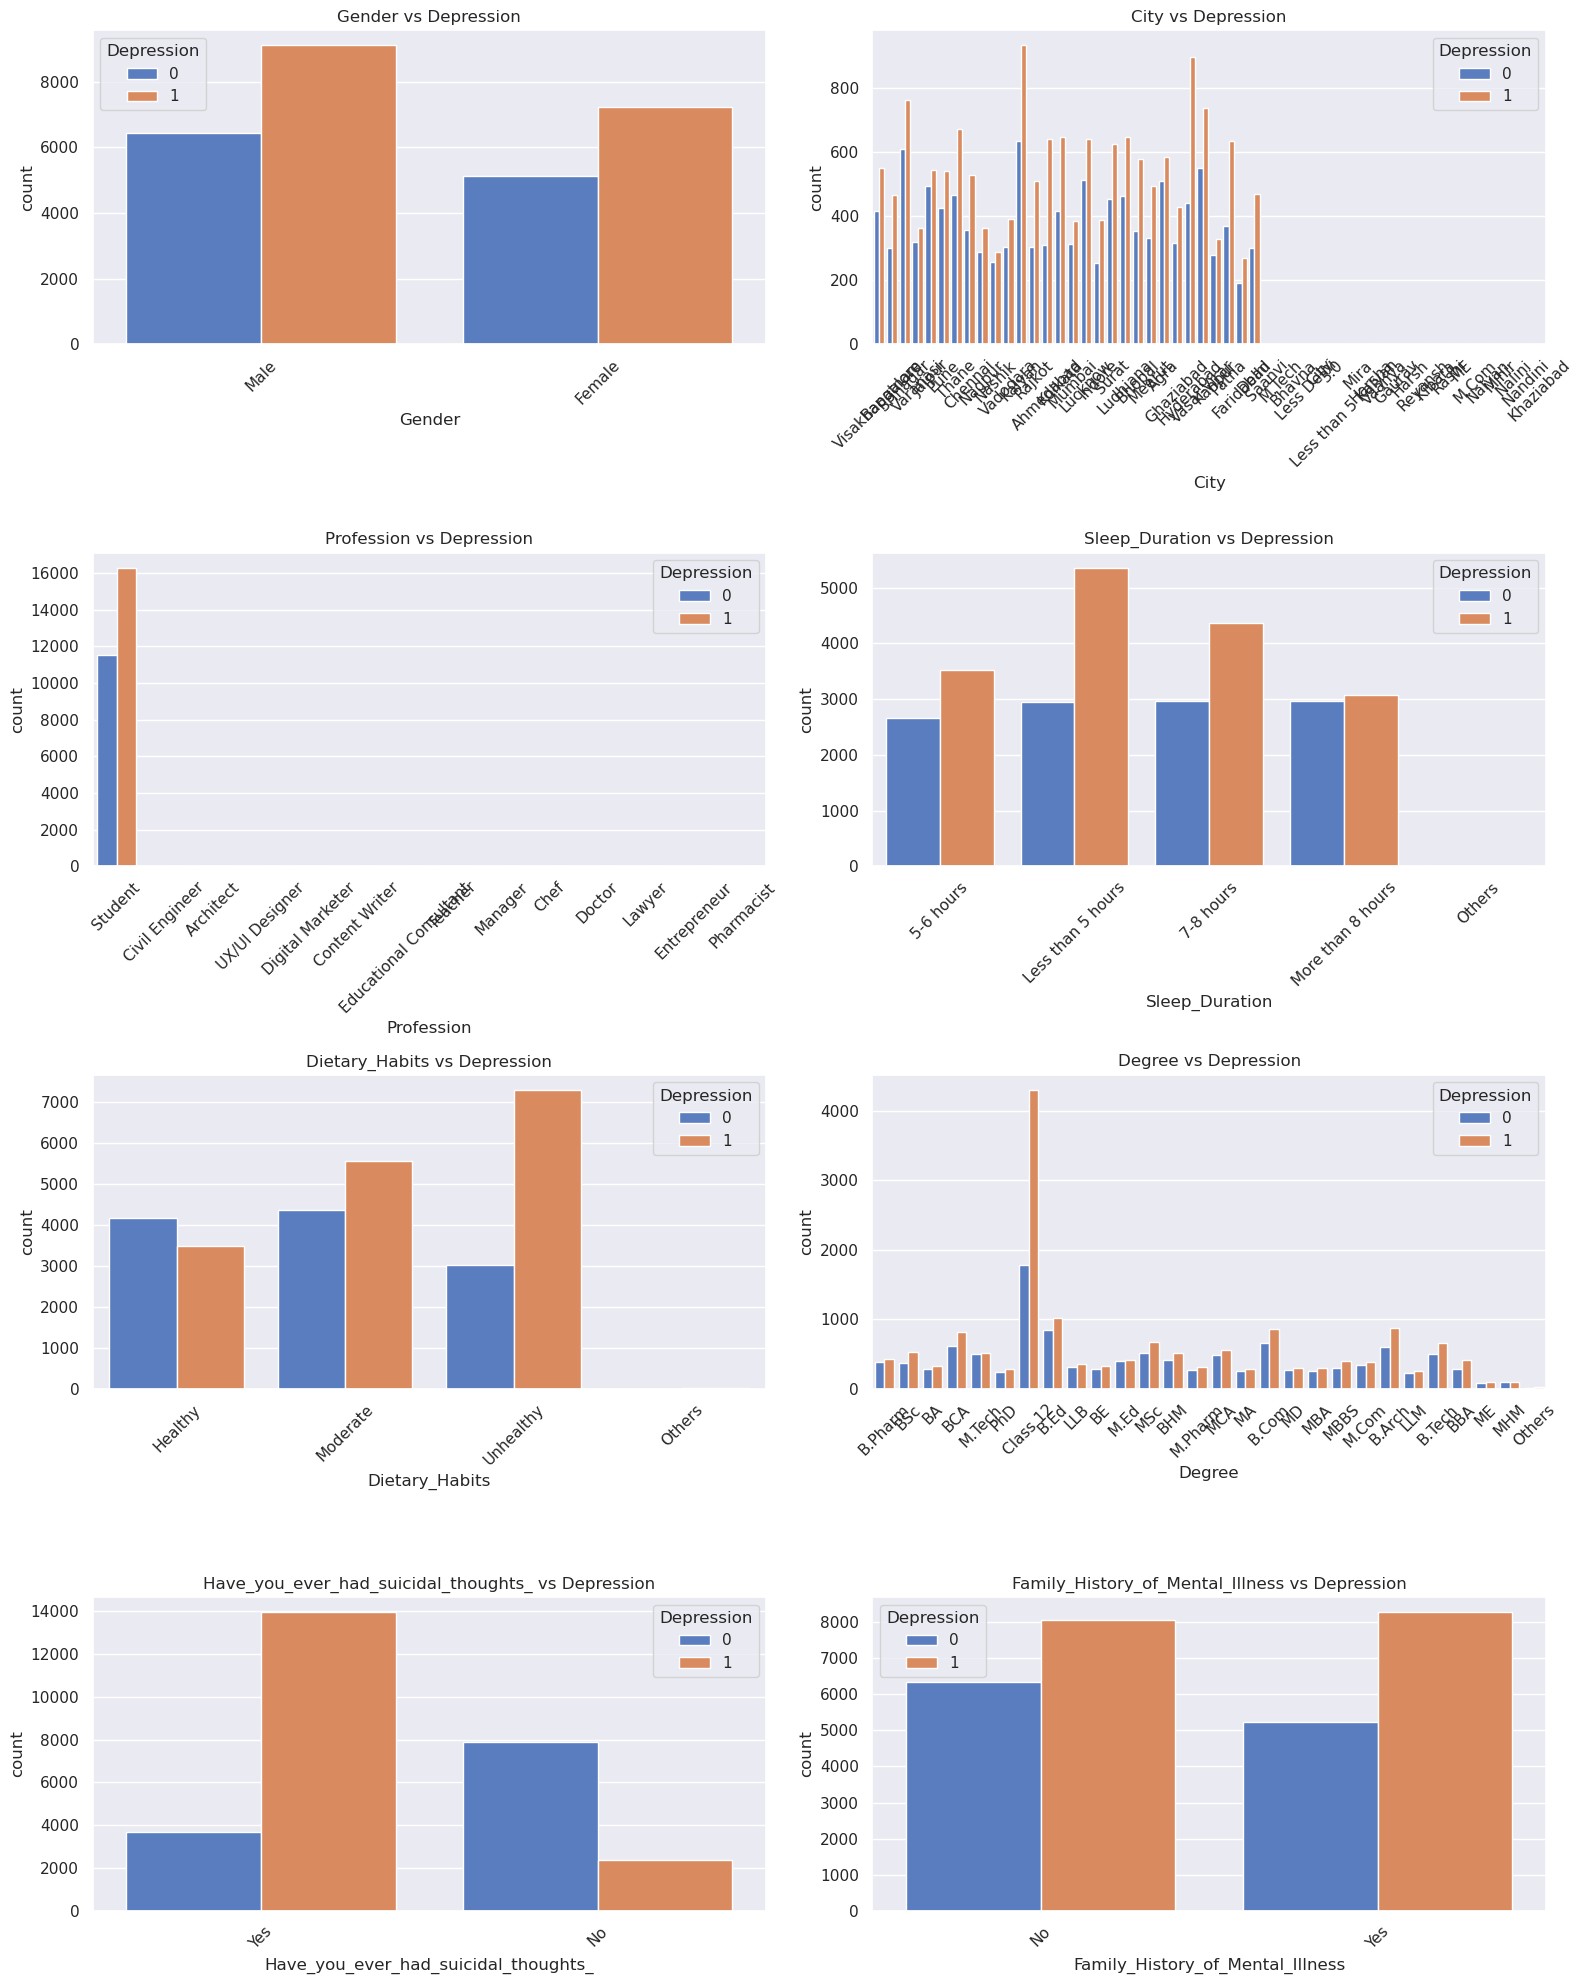

In [193]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, hue='Depression', palette='muted')
    plt.title(f"{col} vs Depression")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Boxplots for numerical variables vs target (Depression)

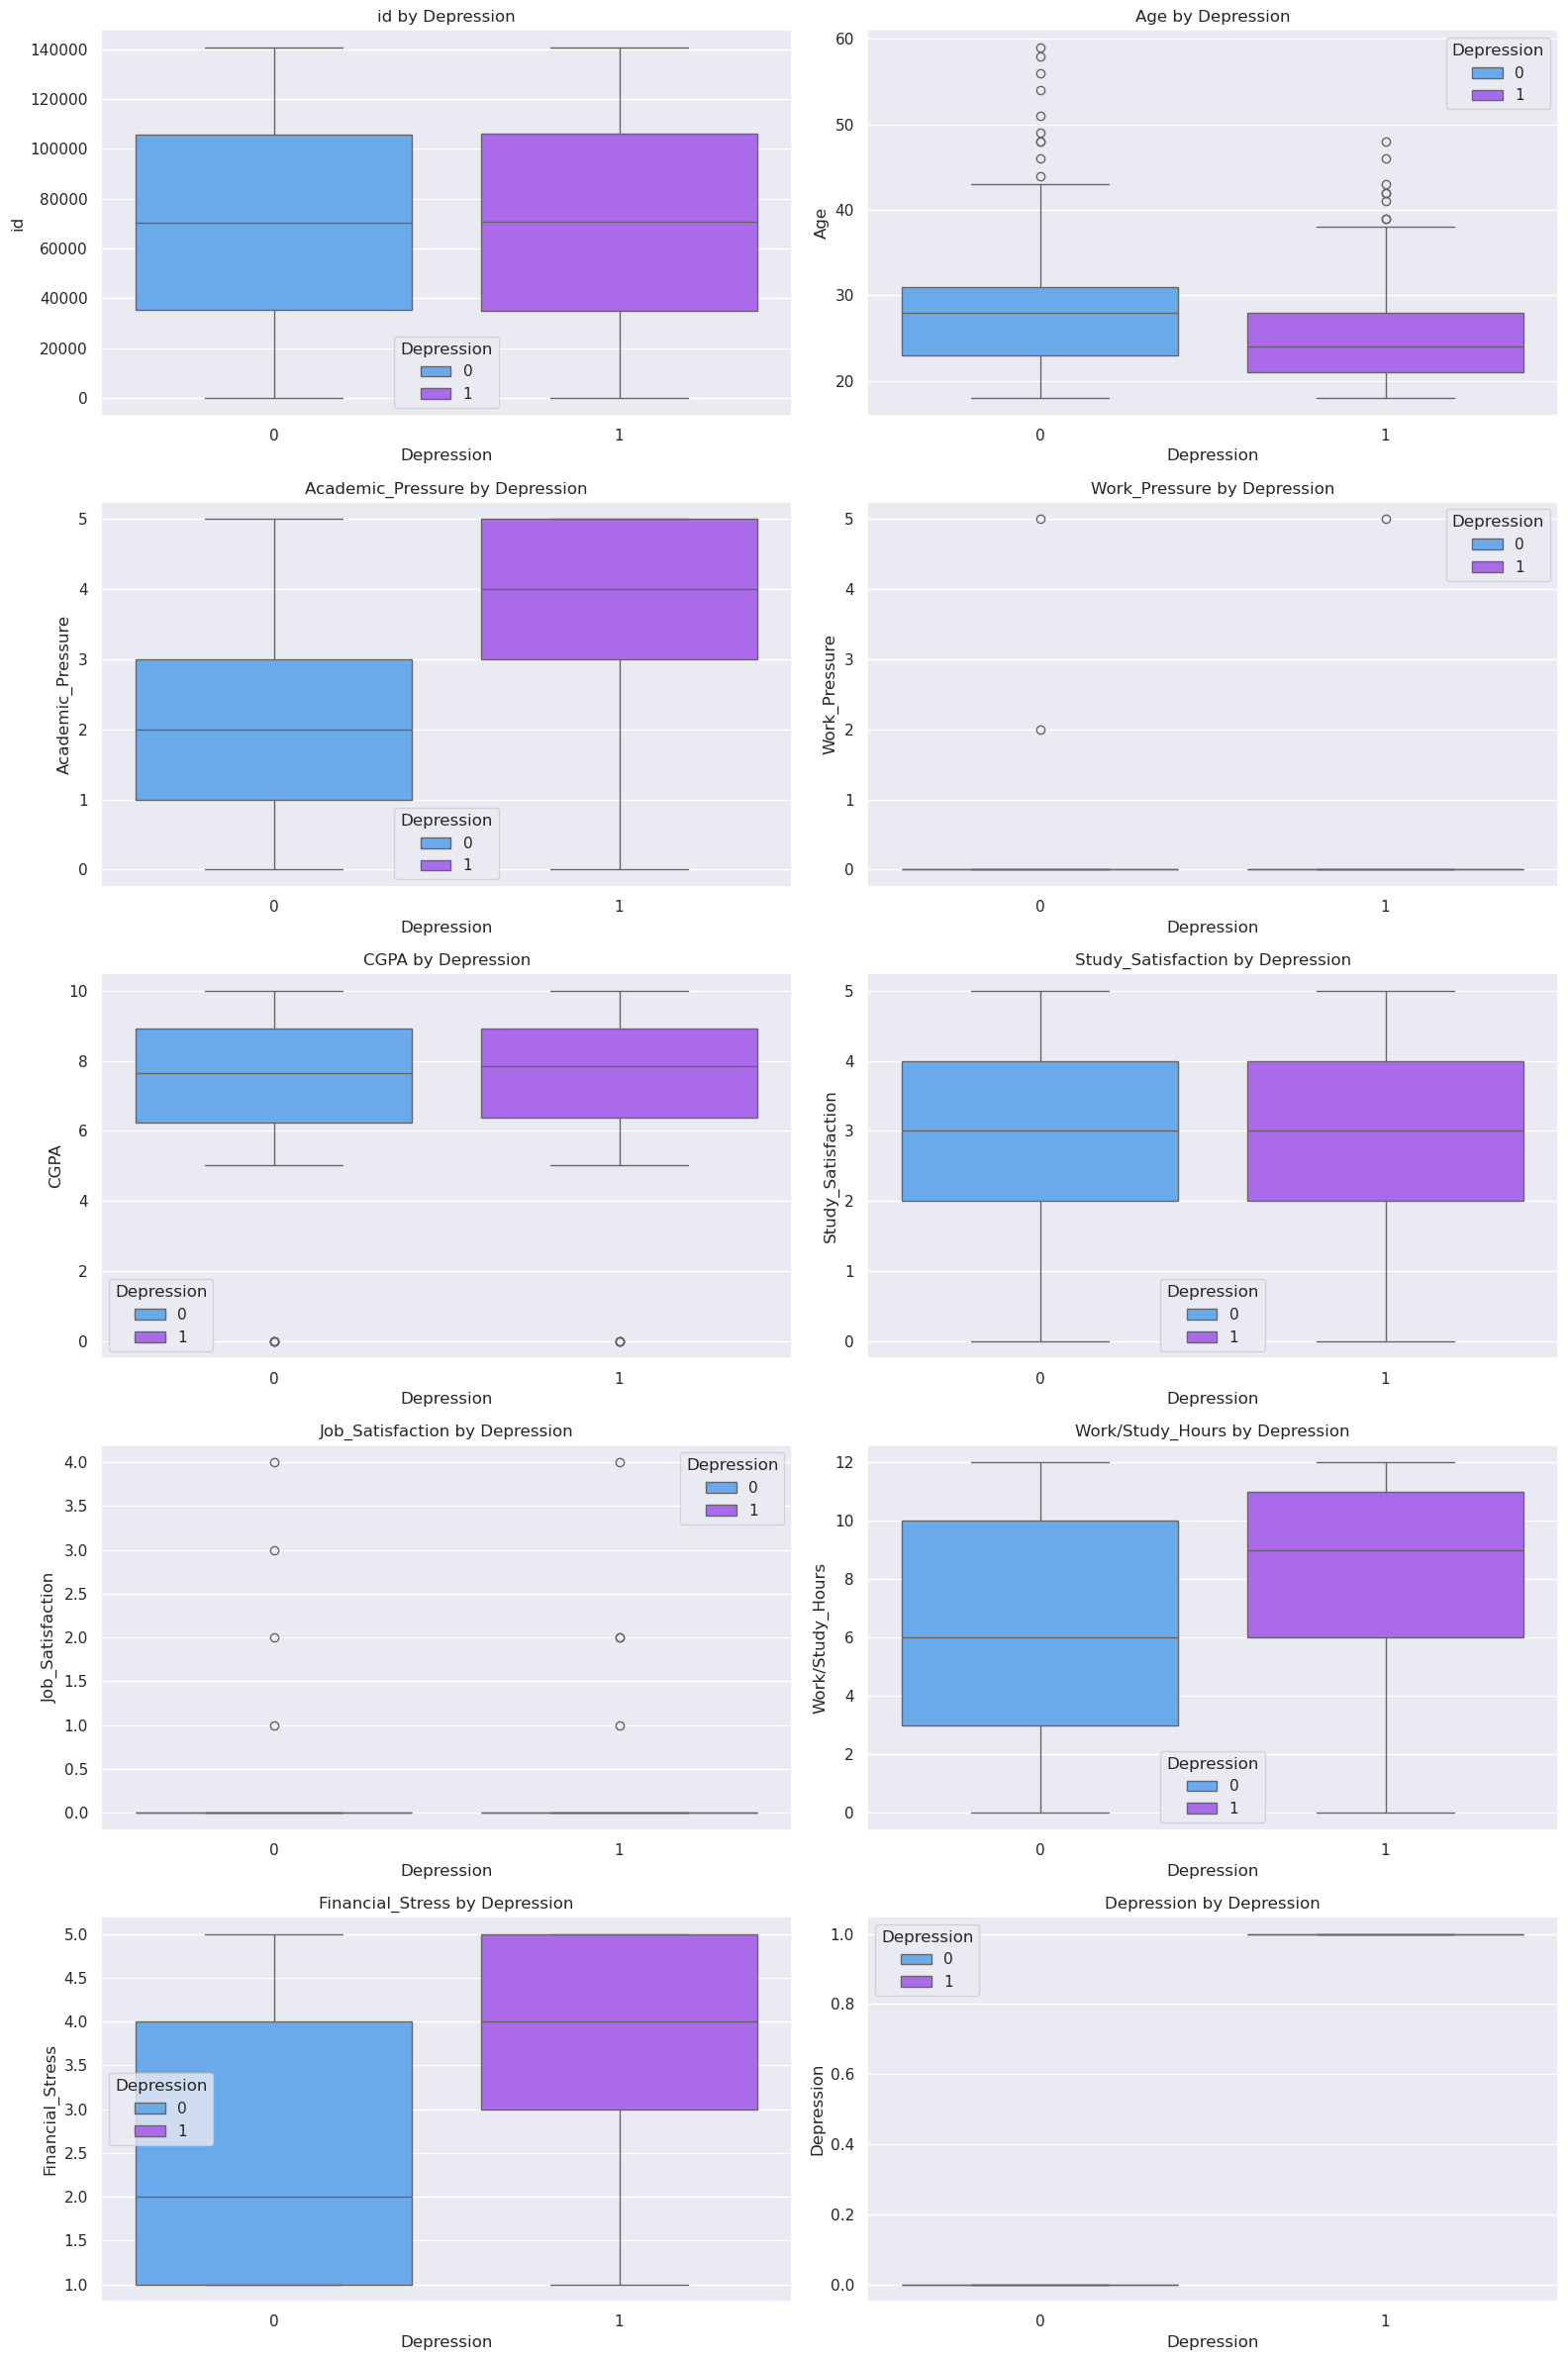

In [194]:
plt.figure(figsize=(16, 24))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=df, x='Depression', y=col, hue='Depression', palette='cool')
    plt.title(f"{col} by Depression")
plt.tight_layout()
plt.show()


### Correlation heatmap

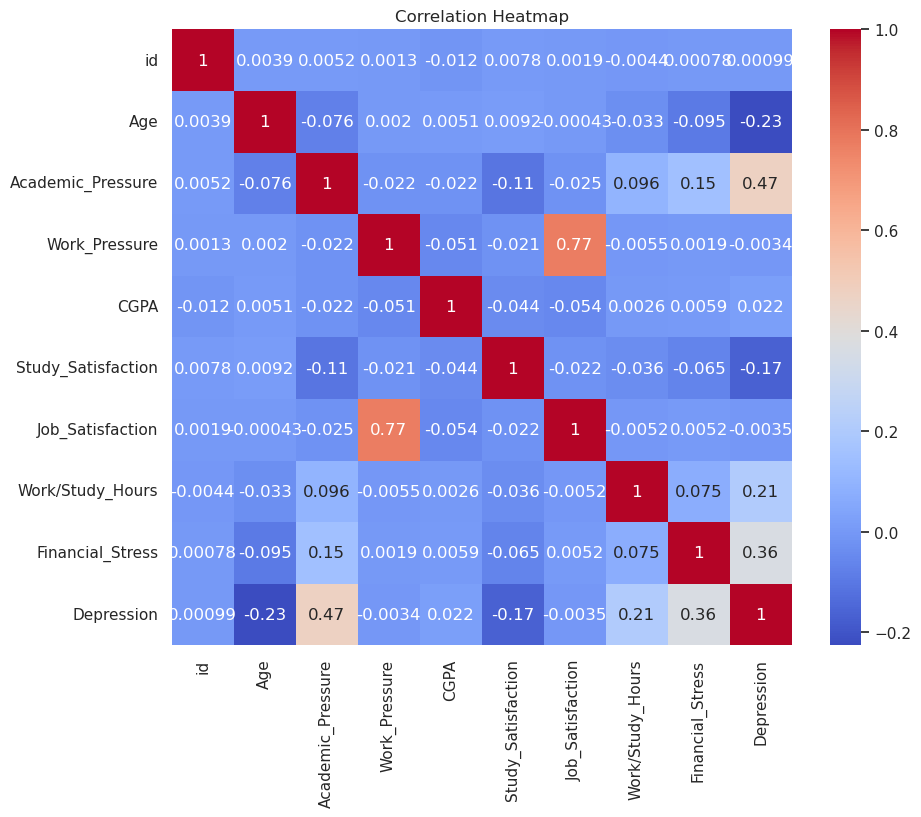

In [195]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Analyse Variables and Drepressed Students 

In [196]:
no_depression = df[df['Depression'] == 0]
depression = df[df['Depression'] == 1]

### Gender

In [197]:
depression['Gender'].value_counts()

Gender
Male      9115
Female    7220
Name: count, dtype: int64

### Age

<Axes: xlabel='Age', ylabel='Count'>

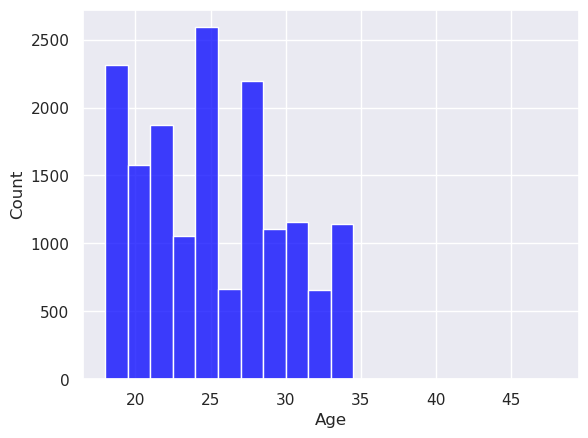

In [198]:
sns.histplot(depression['Age'], color='blue', bins=20)

### City

In [199]:
depression['City'].value_counts()

City
Kalyan           934
Hyderabad        897
Srinagar         763
Vasai-Virar      739
Thane            673
Kolkata          649
Ludhiana         647
Lucknow          641
Ahmedabad        640
Patna            636
Surat            625
Agra             585
Bhopal           579
Visakhapatnam    552
Jaipur           543
Pune             541
Chennai          528
Rajkot           511
Meerut           493
Delhi            468
Bangalore        467
Ghaziabad        428
Vadodara         390
Indore           389
Mumbai           386
Varanasi         363
Nagpur           363
Kanpur           330
Nashik           289
Faridabad        271
Saanvi             2
Bhavna             2
City               1
3.0                1
Mira               1
Harsha             1
Vaanya             1
Gaurav             1
Harsh              1
M.Com              1
Mihir              1
Nalini             1
Khaziabad          1
Name: count, dtype: int64

### Profession

In [200]:
depression['Profession'].value_counts()

Profession
Student                   16307
Architect                     7
Teacher                       5
Content Writer                2
Chef                          2
Digital Marketer              2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

### Academic Pressure

<Axes: xlabel='Academic_Pressure', ylabel='Count'>

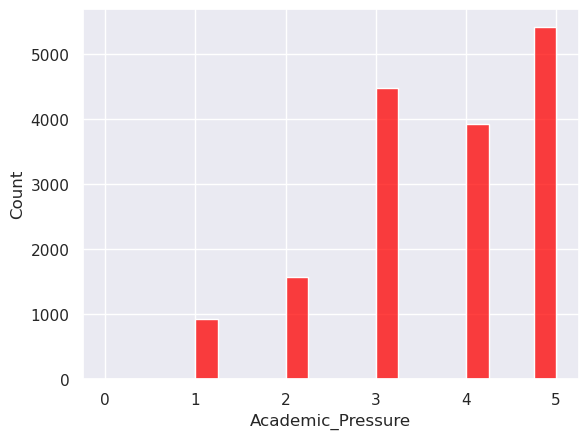

In [201]:
sns.histplot(depression['Academic_Pressure'], color='red', bins=20)

### CGPA

In [202]:
depression['CGPA'].value_counts()

CGPA
8.0400    533
9.9600    274
8.9500    232
5.7400    222
9.2100    212
         ... 
6.3200      1
6.2400      1
6.6400      1
7.0625      1
6.4400      1
Name: count, Length: 325, dtype: int64

<Axes: xlabel='CGPA', ylabel='Count'>

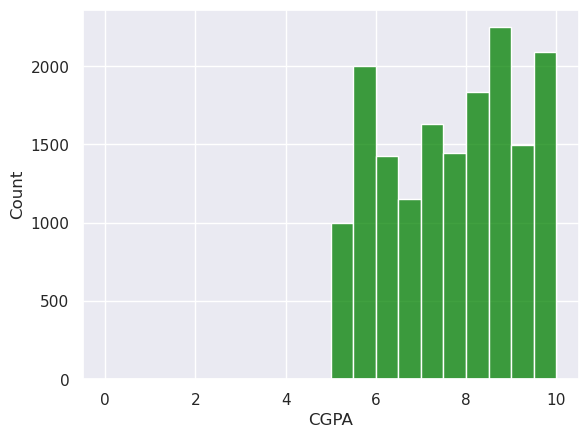

In [203]:
sns.histplot(depression['CGPA'], color='green', bins=20)

### Work per Study Hour

In [204]:
depression['Work/Study_Hours'].value_counts()

Work/Study_Hours
10.0    2979
12.0    2168
11.0    1960
8.0     1568
6.0     1288
9.0     1214
7.0     1176
4.0      815
5.0      706
3.0      697
2.0      696
0.0      604
1.0      464
Name: count, dtype: int64

<Axes: xlabel='Work/Study_Hours', ylabel='Count'>

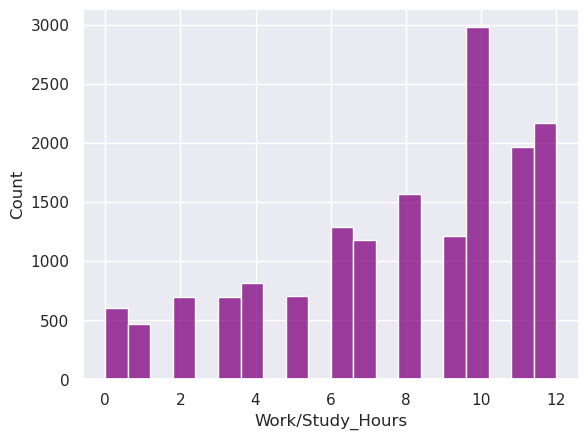

In [205]:
sns.histplot(depression['Work/Study_Hours'], color='purple', bins=20)

### Study Satisfaction

<Axes: xlabel='Study_Satisfaction', ylabel='Count'>

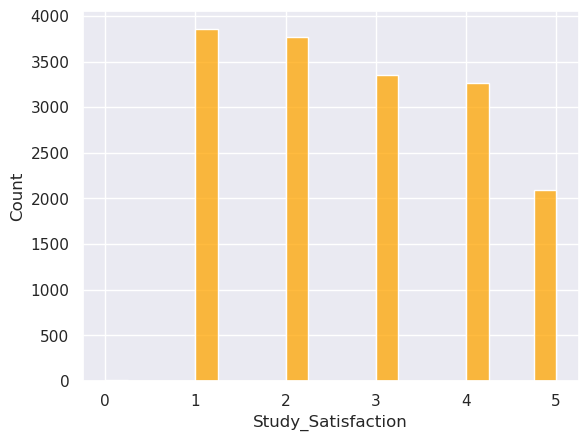

In [206]:
sns.histplot(depression['Study_Satisfaction'], color='orange', bins=20)

### Job Satisfaction

In [207]:
depression['Job_Satisfaction'].value_counts()

Job_Satisfaction
0.0    16331
2.0        2
1.0        1
4.0        1
Name: count, dtype: int64

### Sleep Duration

In [208]:
depression['Sleep_Duration'].value_counts()

Sleep_Duration
Less than 5 hours    5361
7-8 hours            4371
5-6 hours            3516
More than 8 hours    3078
Others                  9
Name: count, dtype: int64

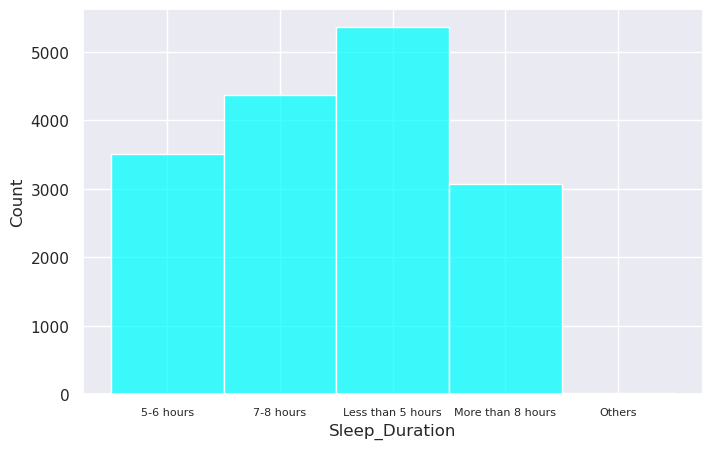

In [209]:
plt.figure(figsize=(8, 5))
sns.histplot(depression['Sleep_Duration'], color='cyan', bins=20)
plt.tick_params(axis='x', labelsize=8) 

### Degree

In [210]:
depression['Degree'].value_counts()

Degree
Class 12    4303
B.Ed        1021
B.Arch       871
B.Com        853
BCA          818
MSc          679
B.Tech       655
MCA          559
BSc          523
M.Tech       521
BHM          509
B.Pharm      428
M.Ed         415
BBA          407
MBBS         404
M.Com        390
LLB          356
BE           334
BA           321
M.Pharm      314
MBA          303
MD           298
MA           290
PhD          286
LLM          259
MHM           99
ME            98
Others        21
Name: count, dtype: int64

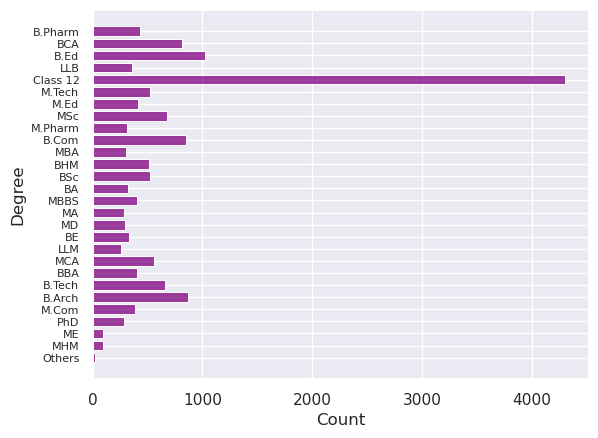

In [211]:
sns.histplot(y=depression['Degree'], color='purple', bins=20, shrink=0.8)
plt.tick_params(axis='y', labelsize=8) 

### Financial Stress

<Axes: xlabel='Financial_Stress', ylabel='Count'>

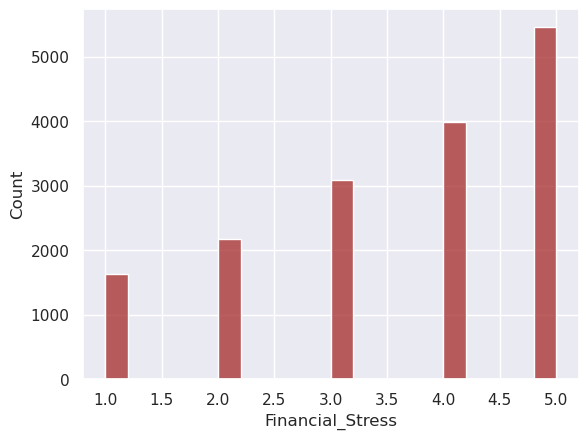

In [212]:
sns.histplot(depression['Financial_Stress'], color='brown', bins=20)

### Suicide Thoughts

<Axes: xlabel='Have_you_ever_had_suicidal_thoughts_', ylabel='Count'>

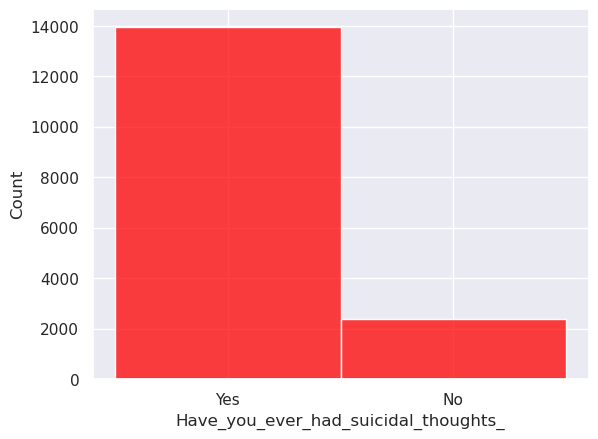

In [213]:
sns.histplot(depression['Have_you_ever_had_suicidal_thoughts_'], color='red', bins=10)

### Family History

<Axes: xlabel='Family_History_of_Mental_Illness', ylabel='Count'>

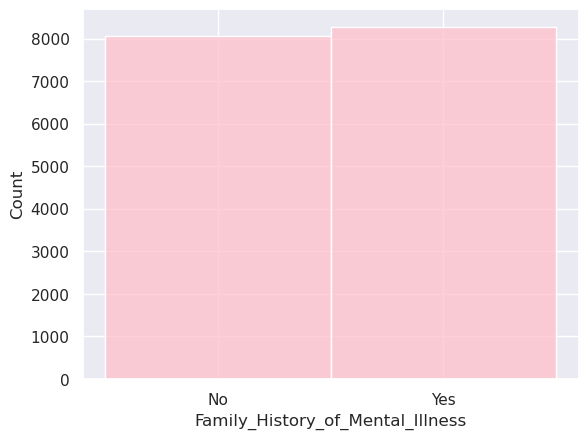

In [214]:
sns.histplot(depression['Family_History_of_Mental_Illness'], color='pink', bins=20)

## Outliers

### Detect Outliers 

#### IQR Method

In [215]:
outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


id: 0 outliers
Age: 12 outliers
Academic_Pressure: 0 outliers
Work_Pressure: 3 outliers
CGPA: 9 outliers
Study_Satisfaction: 0 outliers
Job_Satisfaction: 8 outliers
Work/Study_Hours: 0 outliers
Financial_Stress: 0 outliers
Depression: 0 outliers


#### Z-Score Method (Alternative)

In [216]:
from scipy.stats import zscore
z_scores = df[numerical_cols].apply(zscore)
outliers = (abs(z_scores) > 3)
print(outliers.sum())


id                     0
Age                   19
Academic_Pressure      0
Work_Pressure          3
CGPA                   9
Study_Satisfaction     0
Job_Satisfaction       8
Work/Study_Hours       0
Financial_Stress       0
Depression             0
dtype: int64


### Disply Outliers

<Axes: xlabel='Age'>

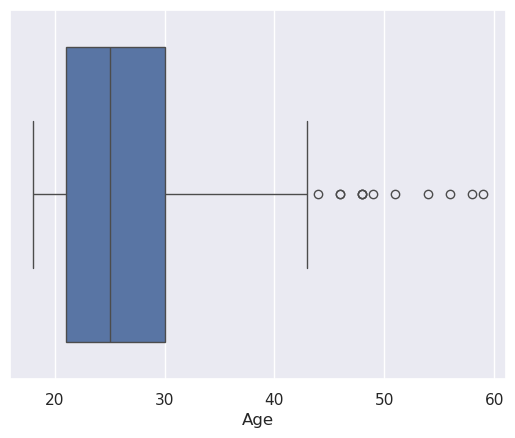

In [217]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Work_Pressure'>

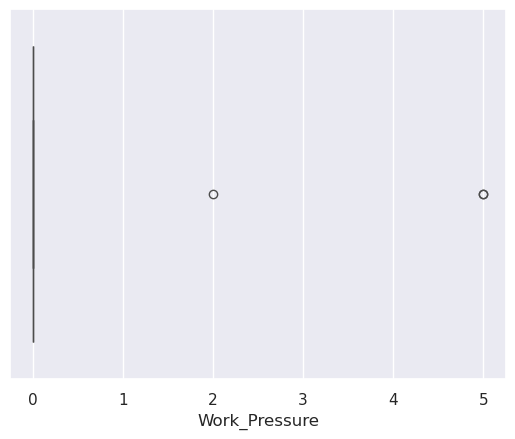

In [218]:
sns.boxplot(x=df['Work_Pressure'])

<Axes: xlabel='CGPA'>

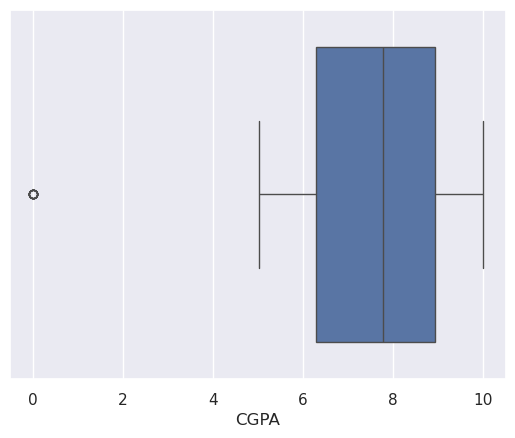

In [219]:
sns.boxplot(x=df['CGPA'])

<Axes: xlabel='Job_Satisfaction'>

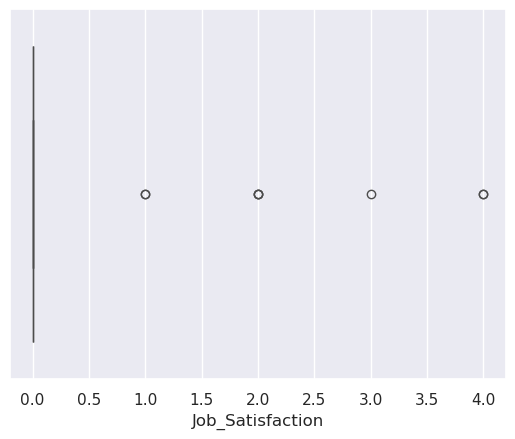

In [220]:
sns.boxplot(x=df['Job_Satisfaction'])

## Conclusion

Dorpping columns - 
1. ID
2. Job_Satisfaction
3. Work_Pressure
4. City
---
Dropping data - 
1. Rows with missing values
2. Null values
3. Non-student data 
---
Also have to remove outliers form - Age & CGPA